# 140. Word Break II

Given an m x n grid of characters board and a string word, return true if word exists in the grid.

The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.

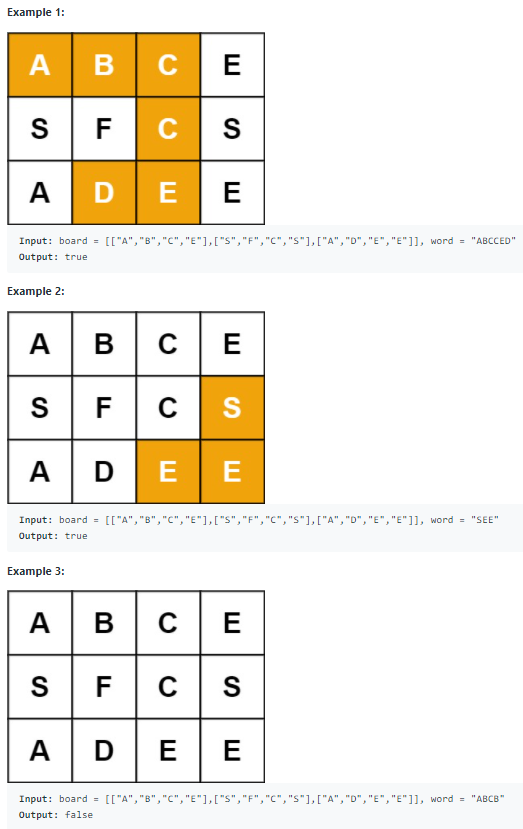

In [6]:
from IPython.display import Image
Image("./Image/79-Example.png", width=500)

## Solution

## DFS

In [8]:

class Solution:
    def exist(self, board, word):
        rows, cols = len(board), len(board[0])
        dirs = [(-1, 0), (1, 0), (0, 1), (0, -1)]
        
        if rows*cols < len(word):
            return False
        
        counter = Counter(word)
        for row in board:
            for ch in row:
                if ch in counter:
                    counter[ch] -= 1
        
        if any(cnt > 0 for cnt in counter.values()):
            return False
        
        def dfs(i, j, curr):
            if curr >= len(word):
                return True
            
            if word[curr] != board[i][j]:
                return False
            
            # check if last cell forms word, no child
            if curr + 1 >= len(word):
                return True
            
            board[i][j] = '#'
            for dx, dy in dirs:
                x, y = i+dx, j+dy
                if 0 <= x < rows and 0 <= y < cols and board[x][y] != "#":
                    if dfs(x, y, curr+1):
                        return True
            
            board[i][j] = word[curr]
            return False
        
        for i in range(rows):
            for j in range(cols):
                if dfs(i, j, 0):
                    return True
        
        return False

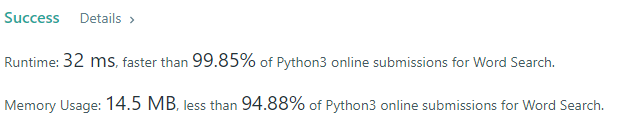

In [7]:
from IPython.display import Image
Image("./Image/79-Submission.png", width=1000)

# 心得

DFS 比 BFS 更快抵達終點